In [2]:
!pip install bitfinex-tencars

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

import bitfinex

In [28]:
# Create api instance of the v2 API
api_v2 = bitfinex.bitfinex_v2.api_v2()

No keys, only access to public API functions


In [22]:
# test connection, get open, high, low, close for 1 minute BTC data --> last 1000 minutes
result = api_v2.candles()

In [4]:
# Define query parameters
pair = 'btcusd'  # currency pair of interest, Bitcoin USD pair
bin_size = '1m'  # 1m = minutes data
limit = 1000     # maximum of 1000 data points

# define start date
t_start = datetime.datetime(2018, 4, 1, 0, 0)
t_start = time.mktime(t_start.timetuple()) * 1000

# define end date
t_stop = datetime.datetime(2018, 4, 2, 0, 0)
t_stop = time.mktime(t_stop.timetuple()) * 1000

result = api_v2.candles(
    symbol = pair,
    interval = bin_size,
    limit = limit,
    start = t_start,
    end = t_stop
)

In [12]:
# create a function to get more than 1000 data points
def fetch_data(start, stop, symbol, interval, tick_limit, step):
    """
    Lets us run larger queries, need to provide step size in milliseconds
    """
    api_v2 = bitfinex.bitfinex_v2.api_v2()
    data = []
    start = start - step
    i = 0
    while start < stop:
        start = start + step
        end = start + step
        res = api_v2.candles(
            symbol = symbol,
            interval = interval,
            limit = tick_limit,
            start = start,
            end = end
        )
        data.extend(res)
        i+=1
        print(f'run: {i}')
        print(start)
        time.sleep(3)
    return data

In [13]:
now = datetime.datetime.now()
print(f'now: {now}')

now: 2020-03-25 16:03:30.055894


In [ ]:
# set step size
time_step = 60000000

# define start date
t_start = datetime.datetime(2014, 1, 1, 0, 0)
t_start = time.mktime(t_start.timetuple()) * 1000

# define end date
t_stop = datetime.datetime.now()
t_stop = time.mktime(t_stop.timetuple()) * 1000

pair_data = fetch_data(
    start = t_start,
    stop = t_stop,
    symbol = pair,
    interval = bin_size,
    tick_limit = limit,
    step = time_step
)

In [8]:
api_v1 = bitfinex.bitfinex_v1.api_v1()
pairs = api_v1.symbols()
len(pairs)

No keys, only access to public API functions


381

In [17]:
# create a pandas data frame from results of api call
cols = [
    'time',
    'open',
    'close',
    'high',
    'low',
    'volume'
]

df = pd.DataFrame(pair_data, columns = cols)
df.drop_duplicates(inplace=True)
df['time'] = pd.to_datetime(df['time'], unit='ms')
df.set_index('time', inplace=True)
df.sort_index(inplace=True)
df.shape

(2602679, 5)

In [18]:
df.head()

,open,close,high,low,volume
time,,,,,
2014-01-01 08:01:00,746.99,747.00,747.00,746.99,2.000000
2014-01-01 08:02:00,743.89,744.89,744.89,743.89,0.020695
2014-01-01 08:04:00,745.01,745.00,745.01,745.00,0.900000
2014-01-01 08:05:00,747.00,747.30,747.30,747.00,2.500000
2014-01-01 08:07:00,744.87,744.87,744.87,744.87,1.230769


In [19]:
df.tail()

,open,close,high,low,volume
time,,,,,
2020-03-26 02:07:00,6700.400000,6700.0,6700.400000,6700.0,0.440617
2020-03-26 02:08:00,6700.000000,6681.5,6700.008115,6675.1,20.049320
2020-03-26 02:09:00,6681.400000,6677.9,6681.400000,6676.1,0.502999
2020-03-26 02:10:00,6679.800000,6679.7,6680.900000,6676.0,0.821444
2020-03-26 02:11:00,6679.754384,6677.5,6679.800000,6677.5,0.693173


In [20]:
df.to_csv('2014_to_march2020_btc_minutes_data')

In [21]:
df.describe()

,open,close,high,low,volume
count,2.602679e+06,2.602679e+06,2.602679e+06,2.602679e+06,2.602679e+06
mean,4.315850e+03,4.315847e+03,4.318177e+03,4.313520e+03,2.003078e+01
std,3.976228e+03,3.976225e+03,3.979053e+03,3.973399e+03,6.443221e+01
min,1.670000e+02,1.670000e+02,1.699600e+02,1.620000e+02,1.000000e-08
25%,5.776847e+02,5.777000e+02,5.779000e+02,5.774600e+02,7.278070e-01
50%,3.676000e+03,3.676000e+03,3.677000e+03,3.675100e+03,4.103125e+00
75%,7.497073e+03,7.497100e+03,7.499500e+03,7.495000e+03,1.594572e+01
max,1.989000e+04,1.989100e+04,1.989100e+04,1.988000e+04,7.228079e+03


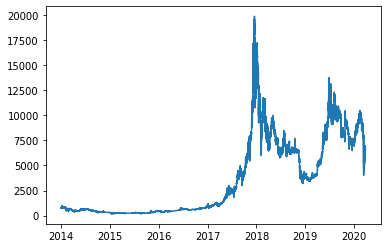

In [27]:
plt.plot(df['close']);